In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [10]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [11]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [12]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [13]:
iqr=df["Ground Temperature"].quantile(0.75)-df["Ground Temperature"].quantile(0.25)
iqr
upper=df["Ground Temperature"].quantile(0.75)+iqr*1.5
lower=df["Ground Temperature"].quantile(0.25)-iqr*1.5

In [14]:
print(lower,upper)

58.400000000000006 98.4


In [15]:
import seaborn as sns

Text(0.5, 1.0, 'GroundTemp Vs Chirps/Second')

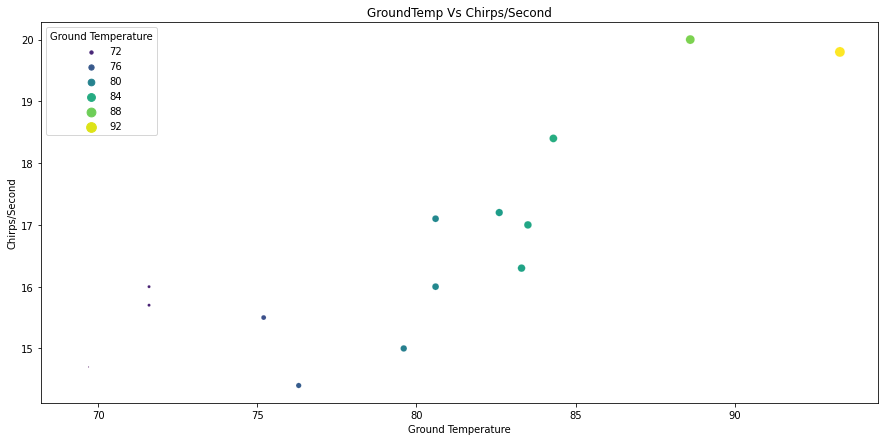

In [17]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,y='Chirps/Second',x='Ground Temperature',hue='Ground Temperature',size='Ground Temperature',sizes=(0,100),palette="viridis")
plt.title('GroundTemp Vs Chirps/Second')

Text(0.5, 1.0, 'GroundTemp Vs Chirps/Second')

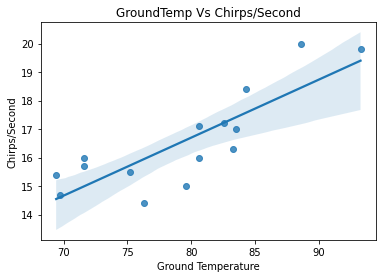

In [18]:
sns.regplot(data=df,y='Chirps/Second',x='Ground Temperature')
plt.title('GroundTemp Vs Chirps/Second')

In [19]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [20]:
y=df.loc[:,['Chirps/Second']].values
x=df.loc[:,['Ground Temperature']].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=77)
print(x_train,"\n\n",y_train,"\n\n",x_test,"\n\n",y_test)

[[80.6]
 [79.6]
 [71.6]
 [88.6]
 [69.4]
 [75.2]
 [82.6]
 [83.5]
 [80.6]
 [71.6]] 

 [[16. ]
 [15. ]
 [16. ]
 [20. ]
 [15.4]
 [15.5]
 [17.2]
 [17. ]
 [17.1]
 [15.7]] 

 [[76.3]
 [69.7]
 [93.3]
 [83.3]
 [84.3]] 

 [[14.4]
 [14.7]
 [19.8]
 [16.3]
 [18.4]]


In [21]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [22]:
c=reg.intercept_  # value of the intercept c
c

array([2.41429014])

In [23]:
m=reg.coef_ # Value of the coefficient m
m

array([[0.17969756]])

In [28]:
reg.predict([[95]])

array([[19.48555832]])

In [26]:
y_predict=reg.predict(x_test)
y_predict

array([[16.12521395],
       [14.93921006],
       [19.18007247],
       [17.38309687],
       [17.56279443]])

In [27]:
from sklearn import metrics
reg.score(x_test,y_test)

0.7588888839075189

In [29]:
gdTemp=(18-c)/m
gdTemp

array([[86.73300782]])

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

1. Equation of the model: y=0.179*x+2.414
2. plotted the graph
3. R^2 = 0.758
4. at temperature 95, rate of chirps is approximated to be 19.48
5. at 18 chirps/second the ground temperature is approximated to be 86.73 degrre Farnheit.


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [30]:
df = pd.read_fwf("/content/sample_data/brain_body.txt")

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model

In [32]:
df = pd.read_fwf("/content/sample_data/brain_body.txt")

In [33]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [35]:
iqr=df["Body"].quantile(0.75)-df["Body"].quantile(0.25)
iqr
upper=df["Body"].quantile(0.75)+iqr*1.5
lower=df["Body"].quantile(0.25)-iqr*1.5
print(lower,upper)

-238.375 408.625


In [36]:
iqr=df["Brain"].quantile(0.75)-df["Brain"].quantile(0.25)
iqr
upper=df["Brain"].quantile(0.75)+iqr*1.5
lower=df["Brain"].quantile(0.25)-iqr*1.5
print(lower,upper)

-70.80375000000001 119.60625


In [38]:

x=df.loc[:,['Body']].values
y=df.loc[:,['Brain']].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [39]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [41]:
c=reg.intercept_
c

array([-55.08684656])

In [42]:
m=reg.coef_
m

array([[0.90702647]])

In [43]:
from sklearn import model_selection
reg.score(x_test,y_test)

0.4312044511001737

#### Answers
1. y = 0.906(x)*(-55.08)
2. Chart is ploted in above cells.
3. R^2 = 0.431

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])